### 假设检验

Stroop任务中，参与者得到了一列文字，每个文字都用一种颜色。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词。在每个情况中，将计量说出同等大小的列表中的墨色名称的时间。

(1) 自变量？因变量？

自变量是文字显示的颜色与打印的颜色名称是否匹配

因变量是参与者将文字显示的颜色说出一遍所需要的时间

(2) 假设集是什么？（文字和数学符号方式对假设集中的零假设和对立假设加以说明）你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。


假设集：

µ_match:文字的颜色和文字打印的颜色匹配的情况下的阅读时间的总体均值

µ_unmatch:文字的颜色和文字打印的颜色不匹配的情况下的阅读时间的总体均值

µ_match = µ_unmatch, 零假设(null hypothesis)：文字的颜色和文字打印的颜色不匹配，不会影响参与者的阅读时间

µ_match != µ_unmatch, 备择假设(alternative hypothesis)：文字的颜色和文字打印的颜色不匹配，会影响参与者的阅读时间

本题选用配对样本t检验（paired t test），因为本题目的是检验文字颜色匹配或不匹配这两个条件下的阅读时间总体均数是否有差别，即同一受试对象接受两种不同的处理。

(3) 描述性统计，包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
import pandas as pf
import numpy as np

df = pf.read_csv('./stroopdata.csv')
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


(4) Data Distribution

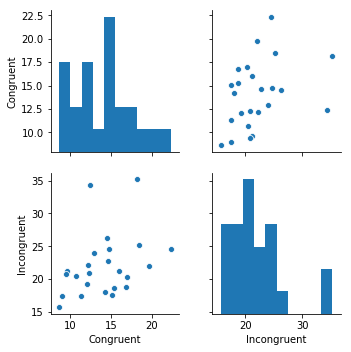

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

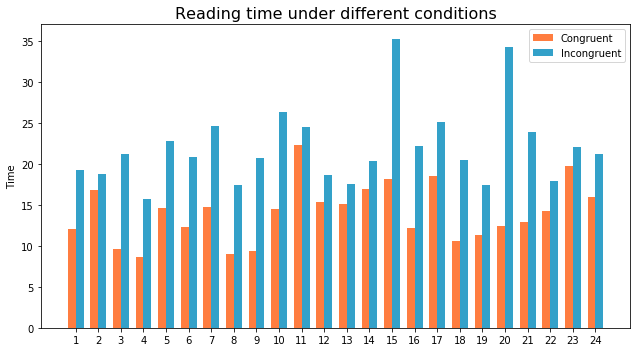

In [3]:
df.index=range(0, len(df.Congruent))
bar_width = 0.7
x_pos = np.arange(len(df.Congruent) * 2, step=2)
plt.figure(figsize=[9,5])
plt.bar(x_pos, df['Congruent'], color='#FF7D40', width=bar_width)
plt.bar(x_pos + bar_width, df['Incongruent'], color='#33A1C9', width=bar_width)
plt.xticks(x_pos + bar_width / 2,df.index+1)
plt.title('Reading time under different conditions', fontsize=16)
plt.ylabel('Time')
plt.legend(df.columns)
plt.tight_layout()
plt.show()

#https://blog.csdn.net/u010606346/article/details/84402398

颜色一致的IQR：4.3054999999999986
颜色不一致的IQR：5.33475
Congruent的异常值：0个
Incongruent的异常值：2个


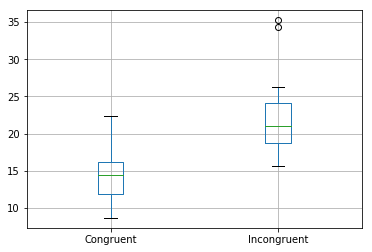

In [4]:
dfStroop = df

# Outlier Detection
Percentile1 = np.percentile(dfStroop['Congruent'], [0, 25, 50, 75, 100])
Percentile2 = np.percentile(dfStroop['Incongruent'], [0, 25, 50, 75, 100])

IQR = lambda p: p[3] - p[1]

IQR1 = IQR(Percentile1)
IQR2 = IQR(Percentile2)


up = lambda p,IQR: p[3] + IQR*1.5
down = lambda p,IQR: p[1] - IQR*1.5

def check(p, up, down):
    count = 0
    for x in p:
        if (x > up) or (x < down):
            count += 1
    return str(count)

print('颜色一致的IQR：' + str(IQR1))
print('颜色不一致的IQR：' + str(IQR2))

up1 = float(up(Percentile1, IQR1))
up2 = float(up(Percentile2, IQR2))
down1 = float(down(Percentile1, IQR1))
down2 = float(down(Percentile2, IQR2))

print('Congruent的异常值：'+check(dfStroop['Congruent'], up1, down1)+'个')
print('Incongruent的异常值：'+check(dfStroop['Incongruent'], up2, down2)+'个')

dfStroop.boxplot();

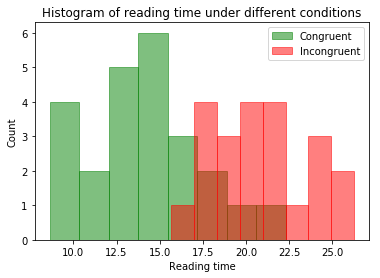

In [5]:
# 洗异常值
dfCongruent = dfStroop.loc[(dfStroop.Congruent>=down1) & (dfStroop.Congruent<=up1),'Congruent']
dfIncongruent = dfStroop.loc[(dfStroop.Incongruent>=down2) & (dfStroop.Incongruent<=up2),'Incongruent']

#histogram
plt.figure()
plt.hist(dfCongruent, bins = 8,facecolor='g',edgecolor='g',alpha=0.5,label='Congruent')
plt.hist(dfIncongruent,bins = 8, facecolor='r',edgecolor='r',alpha=0.5,label='Incongruent')
plt.title('Histogram of reading time under different conditions')
plt.xlabel('Reading time')
plt.ylabel('Count')
plt.legend(loc=1)
plt.show()
#两组数据均可看作正态分布。从图中可以看出，颜色一致时所花时间较少，而不一致则较多。

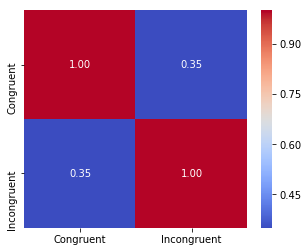

In [6]:
#heatmap
fig, ax = plt.subplots(figsize=(5, 4))
corr = df.corr()
hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f')
plt.show()


1. Incongruent用的时间普遍大于Congruent的时间  
2. 从box-plot检测出Incongruent有两个outliers
3. heatmap和scatter plot(pairplot)能看出这两个变量有较弱的正相关关系

(5) 置信水平和关键统计值？是否成功拒绝零假设？结果是否与你的期望一致？

In [7]:
df.info()  #才24个样本

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [8]:
from scipy import stats

#t统计量:t = mean / sqrt(std/n)，n为样本数
n = 24
mean_con, mean_inc = np.mean(df.Congruent), np.mean(df.Incongruent)
std = np.std(df.Congruent-df.Incongruent, ddof=1)
t = (mean_con - mean_inc)/(std/np.sqrt(n))
t

-8.020706944109955

In [9]:
#算p值，自由度为样本数-1 = 23
p = stats.t.sf(np.abs(t), 23)
p

2.051500292855593e-08


使用单侧检验，显著性水平为1 - 0.95 = 0.05，

有24个样本，自由度为24 - 1 = 23，

查t-test临界值表，在显著性水平为0.05，自由度为23时，临界值为2.069，

p值 = 2.051500292855593e-08 小于 显著性水平值0.05，

因此，拒绝零假设，选择备择假设，即显示的颜色与打印的颜色名称不匹配时，对阅读者的阅读时间确实有影响。

In [10]:
# 统计检验
meanC, meanI = np.mean(dfStroop.Congruent), np.mean(dfStroop.Incongruent)
std = np.std(dfStroop.Congruent-dfStroop.Incongruent,ddof=1)
t = (meanC - meanI)/(std/np.sqrt(24))
print(t)

# P值
p = stats.t.sf(np.abs(t), 23)
print(p)

#置信区间
mean_bar = meanC - meanI
ci = std / np.sqrt(24) * 2.069

low_limit = mean_bar - ci
high_limit = mean_bar + ci
print("95%%置信区间：[%.3f , %.3f]" % (low_limit,high_limit))

-8.020706944109955
2.051500292855593e-08
95%置信区间：[-10.019 , -5.910]
